In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('titanic/train.csv')

In [4]:
df.shape

(891, 12)

In [5]:
df.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [6]:
## check for empty rows
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
print(df['Fare'].isnull().sum())

0


In [8]:
## combining siblings and parents to get family size rather than having two different variables
df['fam_size'] = df['Parch'] + df['SibSp']

In [9]:
print(df['fam_size'])

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: fam_size, Length: 891, dtype: int64


In [10]:
print(df['Name'][10:20])

10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles Eugene
18    Vander Planke, Mrs. Julius (Emelia Maria Vande...
19                              Masselmani, Mrs. Fatima
Name: Name, dtype: object


In [11]:
## I want to use the title as a variable so I split out the part of the string between ',' and '.'
df['comma'] = df['Name'].str.find(',') + 2
df['fullstop'] = df['Name'].str.find('.')

In [12]:
df['Title'] = df.apply(lambda x: x['Name'][x['comma']:x['fullstop']],axis=1)

In [13]:
print(df['Title'][700: 710])

700       Mrs
701        Mr
702      Miss
703        Mr
704        Mr
705        Mr
706       Mrs
707        Mr
708      Miss
709    Master
Name: Title, dtype: object


In [14]:
## the age column misses a lot of values 177/891 so the question what to do about it. 
## one approach would be to take the mean/average 
df['Age'].mean()

29.69911764705882

In [15]:
## Checking whether title can help here

In [16]:
set(df['Title'])

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [17]:
## some of the titles are very obscure so replace them with 'Rare Title' I also want to consolidate Miss and Mlle etc.
df['New_Title'] = df['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir', 'the Countess' ], 'Rare Title')

In [18]:
df['New_Title'] = df['New_Title'].replace(['Mlle', 'Ms'], 'Miss')
df['New_Title'] = df['New_Title'].replace(['Mme'], 'Mrs')
print(df['New_Title'][250: 260])

250      Mr
251     Mrs
252      Mr
253      Mr
254     Mrs
255     Mrs
256     Mrs
257    Miss
258    Miss
259     Mrs
Name: New_Title, dtype: object


In [19]:
set(df['New_Title'])

{'Master', 'Miss', 'Mr', 'Mrs', 'Rare Title'}

In [20]:
## correlation between age and new_title
df['New_Title_Num'] = df['New_Title'].replace({'Master': 0,'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Rare Title': 4})


In [21]:
df['Age'].corr(df['New_Title_Num'])

0.5088562778426374

In [22]:
## there is a fairly high correlation
df['New_Title'].value_counts()

Mr            517
Miss          185
Mrs           126
Master         40
Rare Title     23
Name: New_Title, dtype: int64

In [23]:
df.groupby('New_Title')['Age'].mean()

New_Title
Master         4.574167
Miss          21.845638
Mr            32.368090
Mrs           35.788991
Rare Title    45.545455
Name: Age, dtype: float64

In [24]:
## ok so apparently Master is a little boy..  So I want to fill in the missing 
## age values with the average ages of the corresponding title

In [25]:
df['Age_Average'] = df['Age']

In [26]:
df.loc[(df['New_Title'] == 'Master'), 'Age_Average'] = 4.57
df.loc[(df['New_Title'] == 'Miss'), 'Age_Average'] = 21.85
df.loc[(df['New_Title'] == 'Mr'), 'Age_Average'] = 32.36
df.loc[(df['New_Title'] == 'Mrs'), 'Age_Average'] = 35.79
df.loc[(df['New_Title'] == 'Rare Title'), 'Age_Average'] = 45.55

In [27]:
df['Complete_Age'] = df['Age']
df['Complete_Age'].fillna(df['Age_Average'],inplace = True)

In [28]:
print(df.isnull().sum())

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
fam_size           0
comma              0
fullstop           0
Title              0
New_Title          0
New_Title_Num      0
Age_Average        0
Complete_Age       0
dtype: int64


In [29]:
df['Embarked'].fillna('S', inplace = True)

In [30]:
print(df.isnull().sum())

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           0
fam_size           0
comma              0
fullstop           0
Title              0
New_Title          0
New_Title_Num      0
Age_Average        0
Complete_Age       0
dtype: int64


In [31]:
## We have now simplified the titles, created a family(size) variable and replaced the missing age values
## with meaningful values 
## I want to use Pclass, Sex, Complete_Age, Fare, fam_size and Embarked es explanatory variables
## Sex and Embarked are strings so should be turned into numbers or perhaps categories for analysis

In [32]:
## create new column true if male false if female
df['Sex-Bool'] = (df['Sex'] == 'male') 

In [33]:
## categorize Embarked
df = pd.concat([df, pd.get_dummies(df['Embarked'])], axis=1)

In [34]:
## categorize New_Title
df = pd.concat([df, pd.get_dummies(df['New_Title'])], axis=1)

In [35]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'fam_size', 'comma',
       'fullstop', 'Title', 'New_Title', 'New_Title_Num', 'Age_Average',
       'Complete_Age', 'Sex-Bool', 'C', 'Q', 'S', 'Master', 'Miss', 'Mr',
       'Mrs', 'Rare Title'],
      dtype='object')

In [36]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [37]:
Y = df['Survived']
features_df = df[['Pclass', 'Fare', 'Master', 'Miss', 'Mr',
       'Mrs', 'Sex-Bool', 'C', 'S']]

In [38]:
y = Y.values
x = features_df.values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.3, shuffle = True)

In [40]:
from sklearn.ensemble import RandomForestClassifier
model_random = RandomForestClassifier(random_state=1)
model_random.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [41]:
model_random.score(X_test, y_test)

0.8097014925373134

In [42]:
model_tree = tree.DecisionTreeClassifier(max_depth = 7)
model_tree.fit(X_train, y_train)
model_tree.score(X_test, y_test)

0.835820895522388

In [43]:
y_tree_pred = model_tree.predict(X_test)

In [44]:
import numpy as np
condition_1 = y_tree_pred == 1
condition_2 = y_test == 1
condition_01 = y_tree_pred == 0
condition_02 = y_test == 0

In [45]:
correct_1 = np.where(condition_1 & condition_2)
false_1 = np.where(condition_1 & condition_02)

In [46]:
correct_0 = np.where(condition_01 & condition_02)
false_0 = np.where(condition_01 & condition_2)

In [47]:
print('correct deaths' ,len(np.array(correct_0)[0]), ' incorrect deaths ', len(np.array(false_0)[0]))

correct deaths 146  incorrect deaths  28


In [48]:
print('correct survivors' ,len(np.array(correct_1)[0]), ' incorrect survivors ', len(np.array(false_1)[0]))

correct survivors 78  incorrect survivors  16


In [49]:
print(len(y_test))

268


In [50]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

In [51]:
logreg_model.fit(X_train, y_train)
logreg_model.score(X_test, y_test)

0.7873134328358209

In [52]:
## save models for submission
import pickle
# pickle.dump( model_tree, open( "model_tree_01", "wb" ) )

In [53]:
# pickle.dump(logreg_model, open("logreg_01", "wb"))
pickle.dump(model_tree, open( "model_tree_02", "wb"))

In [54]:
df['Survived'].corr(df['Complete_Age'])

-0.08935208065197985

In [55]:
df['Survived'].corr(df['Sex-Bool'])

-0.543351380657755

In [56]:
df['Survived'].corr(df['Fare'])

0.25730652238496227

In [57]:
df['Survived'].corr(df['Pclass'])

-0.33848103596101475

In [58]:
df['Survived'].corr(df['fam_size'])

0.016638989282745265

In [59]:
df['Survived'].corr(df['Q'])

0.003650382683971961

In [60]:
df['Survived'].corr(df['S'])

-0.1496827232706859

In [61]:
df['Survived'].corr(df['C'])

0.16824043121823284

In [62]:
df['Survived'].corr(df['Mr'])

-0.549199184903009

In [63]:
df['Survived'].corr(df['Master'])

0.08522056083929425

In [64]:
df['Survived'].corr(df['Miss'])

0.3356355207687266

In [65]:
df['Survived'].corr(df['Mrs'])

0.34199372628575564

In [66]:
df['Survived'].corr(df['Rare Title'])

-0.01205406019711439

In [67]:
df['Pclass'].corr(df['Fare'])

-0.5494996199439078

In [68]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)

In [69]:
gnb.score(X_test, y_test)

0.7798507462686567

In [70]:
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train_sc = scaler.transform(X_train)  
X_test_sc = scaler.transform(X_test) 
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 2), random_state=0, max_iter=5000) 
clf.fit(X_train_sc, y_train)
clf.score(X_test_sc, y_test)

0.8097014925373134

In [71]:
# pickle.dump(clf, open( "neural_nw_01", "wb"))

In [76]:
survived_by_title = df.groupby('New_Title')['Survived'].mean()

In [77]:
print(survived_by_title)

New_Title
Master        0.575000
Miss          0.702703
Mr            0.156673
Mrs           0.793651
Rare Title    0.347826
Name: Survived, dtype: float64


In [82]:
import matplotlib.pyplot as plot

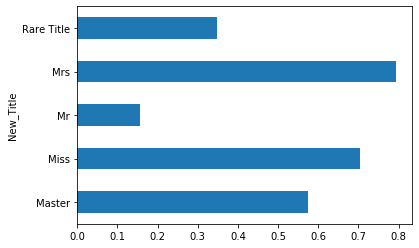

In [117]:
survived_by_title.plot.barh()

In [120]:
survived_by_sex = df.groupby('Sex')['Survived'].mean()

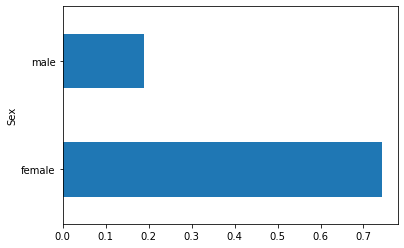

In [123]:
survived_by_sex.plot.barh()

In [130]:
survived_by_class = df.groupby('Pclass')['Survived'].mean()

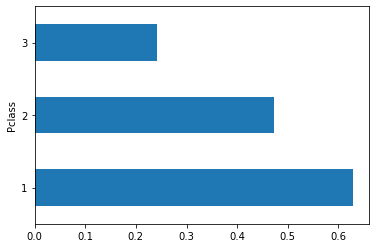

In [131]:
survived_by_class.plot.barh()

In [99]:
survived_by_title.axes

[Index(['Master', 'Miss', 'Mr', 'Mrs', 'Rare Title'], dtype='object', name='New_Title')]